In [1]:
# Import the pandas library for data handling
import pandas as pd

# Load the cleaned dataset (adjust the path as needed)
df = pd.read_csv("../shopping_behavior_cleaned.csv")

# Display the first 5 rows of the dataset
df


Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)  Season  Review Rating  Subscription Status  \
0                        53  Winter            3.1                    1   
1                        64  Winter            3.1                    1   
2                        73  Spring            3.1                    1   
3                        90  Spring            3.5                    1   
4                        49  Spring            2.7                    1   
...                     ...     ...            ...                  ...   
3895                     28  Summer            4.2                    0   
3896                     49  Spring            4.5                    0   
3897                     33  Spring            2.9                    0   
3898                     77  Summer            3.8                    0   
3899                     81  Spring            3.1                    0   

      Discount Applied  Promo Code Used  Previous Purchases  \
0                    1                1                  14   
1                    1                1                   2   
2                    1                1                  23   
3                    1                1                  49   
4                    1                1                  31   
...                ...              ...                 ...   
3895                 0                0                  32   
3896                 0                0                  41   
3897                 0                0                  24   
3898                 0                0                  24   
3899                 0                0                  33   

     Frequency of Purchases  Frequency Value  
0                 Bi-Weekly                4  
1                 Bi-Weekly                4  
2                    Weekly                5  
3                    Weekly                5  
4                  Annually                1  
...                     ...              ...  
3895                 Weekly                5  
3896              Bi-Weekly                4  
3897              Quarterly                2  
3898                 Weekly                5  
3899              Quarterly                2  

[3900 rows x 14 columns]

In [2]:
# Check the shape and column names of the dataset
df.shape, df.columns

((3900, 14),
 Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
        'Purchase Amount (USD)', 'Season', 'Review Rating',
        'Subscription Status', 'Discount Applied', 'Promo Code Used',
        'Previous Purchases', 'Frequency of Purchases', 'Frequency Value'],
       dtype='object'))

In [3]:
# Select features relevant to customer behavior for clustering
features = df[[
    'Age',
    'Gender',
    'Category',
    'Purchase Amount (USD)',
    'Season',
    'Review Rating',
    'Frequency Value',
    'Previous Purchases'
]]


In [4]:
# Perform one-hot encoding for categorical variables
features_encoded = pd.get_dummies(features, columns=['Gender', 'Category', 'Season'], drop_first=True)


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features_encoded)


In [6]:
# Convert the scaled features back into a DataFrame for readability
import numpy as np

scaled_df = pd.DataFrame(scaled_features, columns=features_encoded.columns)

# Display the first few rows of the final dataset to be used for clustering
scaled_df.head()


Age  Purchase Amount (USD)  Review Rating  Frequency Value  \
0  0.718913              -0.285629      -0.907584         0.788616   
1 -1.648629               0.178852      -0.907584         0.788616   
2  0.390088               0.558882      -0.907584         1.552931   
3 -1.517099               1.276716      -0.349027         1.552931   
4  0.061263              -0.454531      -1.466141        -1.504328   

   Previous Purchases  Gender_Male  Category_Clothing  Category_Footwear  \
0           -0.785831     0.685994           1.115908          -0.425981   
1           -1.616552     0.685994           1.115908          -0.425981   
2           -0.162789     0.685994           1.115908          -0.425981   
3            1.637107     0.685994          -0.896131           2.347520   
4            0.391025     0.685994           1.115908          -0.425981   

   Category_Outerwear  Season_Spring  Season_Summer  Season_Winter  
0           -0.301005      -0.586825      -0.569455       1.736801  
1           -0.301005      -0.586825      -0.569455       1.736801  
2           -0.301005       1.704084      -0.569455      -0.575771  
3           -0.301005       1.704084      -0.569455      -0.575771  
4           -0.301005       1.704084      -0.569455      -0.575771

C:\Users\batuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\batuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\batuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\batuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

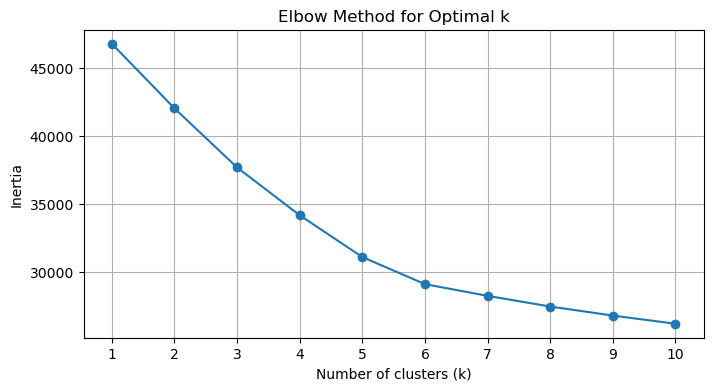

In [7]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia = []

# Try different values of k from 1 to 10
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [8]:
# Train the final KMeans model with optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)

# Assign cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_


C:\Users\batuh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# Display average feature values per cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Purchase Amount (USD)': 'mean',
    'Review Rating': 'mean',
    'Previous Purchases': 'mean',
    'Frequency Value': 'mean'
}).round(1)

# Display the cluster summary
cluster_summary


Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
Cluster                                                                   
0        44.3                   57.2            3.7                25.0   
1        44.2                   60.0            3.7                25.3   
2        44.4                   59.2            3.8                25.2   
3        43.1                   60.7            3.7                25.9   
4        44.4                   60.3            3.8                25.2   

         Frequency Value  
Cluster                   
0                    3.0  
1                    2.9  
2                    3.0  
3                    3.0  
4                    3.0

In [10]:
# Export the data with cluster labels for reporting or visualization
df.to_csv("../clustered_customers.csv", index=False)


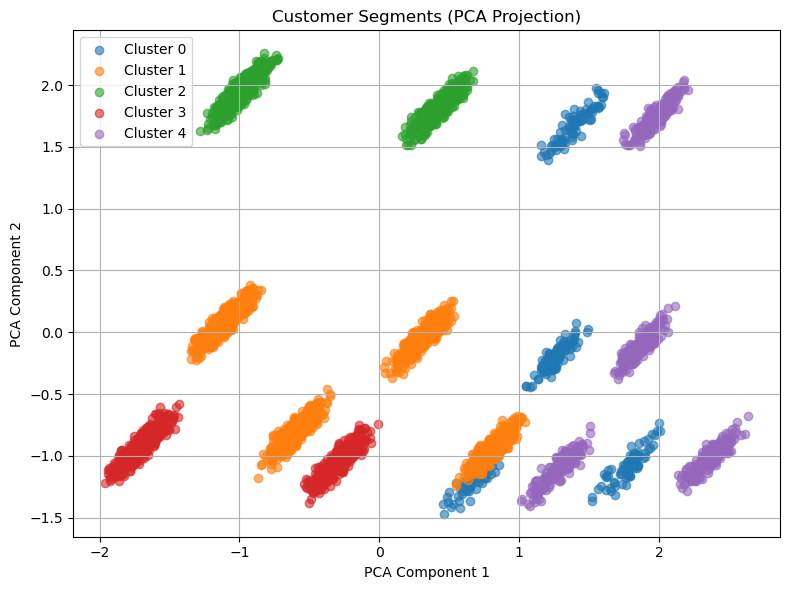

In [11]:
# Import PCA and matplotlib for visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import silhouette_score
import csv

# Calculate silhouette score
score = silhouette_score(scaled_df, df['Cluster'])

# Save metrics to CSV
with open("../results/model_metrics.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Model", "Num_Clusters", "Inertia", "Silhouette_Score"])
    writer.writerow(["KMeans", 5, int(kmeans.inertia_), round(score, 2)])
